<a href="https://colab.research.google.com/github/deepaksirohiwal/Deep_Learning_with_PyTorch/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Cifar10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
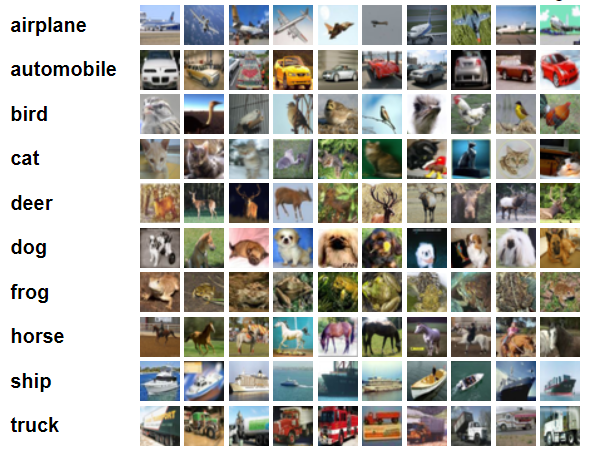

In [71]:
#imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(17)

In [72]:
#setting the device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [73]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [74]:
batch_size=10
#downloading the images
train_data=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_data=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#dataloader
train_loader=torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          )
test_loader=torch.utils.data.DataLoader(test_data,
                                        batch_size=batch_size,
                                        shuffle=True)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [75]:
# shape of a batch
for image, labels in train_loader:
  print('image-shape :',image.shape)
  break

image-shape : torch.Size([10, 3, 32, 32])


In [76]:
# checking images in the dataset
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
      for i in range(len(labels)):
        print('Label :',classes[labels[i]])
        plt.imshow(images[i].permute(1,2,0))

        break
      break

Label : ship


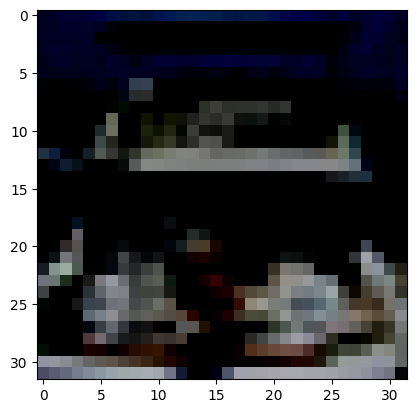

In [77]:
show_batch(train_loader)

# CNN Model and Training

In [83]:
# CNN model
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3,  padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
    nn.Dropout(0.25),

    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
    nn.Dropout(0.25),

    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

    nn.Flatten(),
    nn.Linear(256*4*4, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 10))

In [84]:
learning_rate=0.001

# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [85]:
#moving model to the available device
model= model.to(device)

In [86]:
#traing model on the train_loader
n_total_steps= len(train_loader)
num_epochs=11
for epoch in range(num_epochs):
    model.train()

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        #forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if batch_idx % 2000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")
print("Finished training")

Epoch [1/11], Step [0/5000], Loss: 2.2836
Epoch [1/11], Step [2000/5000], Loss: 1.1919
Epoch [1/11], Step [4000/5000], Loss: 1.8794
Epoch [2/11], Step [0/5000], Loss: 1.2416
Epoch [2/11], Step [2000/5000], Loss: 0.6315
Epoch [2/11], Step [4000/5000], Loss: 0.6530
Epoch [3/11], Step [0/5000], Loss: 1.5250
Epoch [3/11], Step [2000/5000], Loss: 1.1520
Epoch [3/11], Step [4000/5000], Loss: 0.3303
Epoch [4/11], Step [0/5000], Loss: 0.4549
Epoch [4/11], Step [2000/5000], Loss: 0.6186
Epoch [4/11], Step [4000/5000], Loss: 0.4908
Epoch [5/11], Step [0/5000], Loss: 0.3414
Epoch [5/11], Step [2000/5000], Loss: 0.3724
Epoch [5/11], Step [4000/5000], Loss: 0.5484
Epoch [6/11], Step [0/5000], Loss: 0.3411
Epoch [6/11], Step [2000/5000], Loss: 0.2367
Epoch [6/11], Step [4000/5000], Loss: 0.5310
Epoch [7/11], Step [0/5000], Loss: 0.1080
Epoch [7/11], Step [2000/5000], Loss: 0.9475
Epoch [7/11], Step [4000/5000], Loss: 0.4451
Epoch [8/11], Step [0/5000], Loss: 0.5929
Epoch [8/11], Step [2000/5000], Lo

In [87]:
# Testing loop
with torch.no_grad():
    correct = 0
    total = 0

    n_class_correct=[0 for i in range(10)]
    n_class_samples=[0 for i in range(10)]
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label= labels[i]
            pred= predicted[i]
            if(label==pred):
                n_class_correct[label]+=1
            n_class_samples[label]+=1

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

    for i in range(10):
        acc= 100.0 * n_class_correct[i]/n_class_samples[i]
        print(f"Accuracy of the class {classes[i]}:{acc}%")


Test Accuracy: 81.40%
Accuracy of the class plane:87.1%
Accuracy of the class car:90.4%
Accuracy of the class bird:71.5%
Accuracy of the class cat:58.8%
Accuracy of the class deer:79.0%
Accuracy of the class dog:72.1%
Accuracy of the class frog:88.3%
Accuracy of the class horse:86.5%
Accuracy of the class ship:91.2%
Accuracy of the class truck:89.1%


Here we got an accuracy of 81.12%

# Prediction vs actual

In [93]:
# checking the prediction vs the actual image
def predict_image(img, model):
  #moving img to device
  image= img.unsqueeze(0).to(device)
  # predict the image
  predict= model(image)
  # pick index with the highest probability
  _, pred= torch.max(predict,dim=1)
  return classes[pred[0].item()]

Label : cat Predicted class : cat


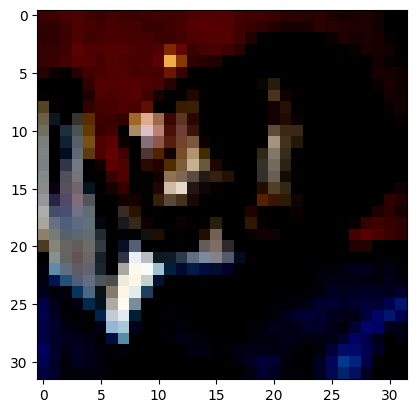

In [94]:
img, label = test_data[0]
plt.imshow(img.permute(1,2,0))
print('Label :',classes[label],'Predicted class :', predict_image(img, model))

Label : plane Predicted class : plane


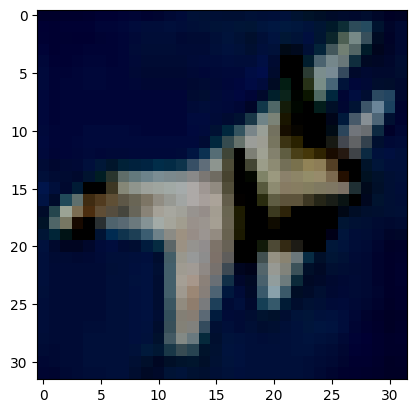

In [95]:
img, label = test_data[10]
plt.imshow(img.permute(1,2,0))
print('Label :',classes[label],'Predicted class :', predict_image(img, model))